In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt # 시각화를 위한 라이브러리
import seaborn as sns # 시각화를 위한 라이브러리
import numpy as np # 다차원 배열을 위한 라이브러리
import pandas as pd
import warnings

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')

# 폰트 설정 확인
print("폰트 설정 완료: ", plt.rcParams['font.family'])

폰트 설정 완료:  ['NanumGothic']


In [ ]:
fire = pd.read_csv("/content/drive/MyDrive/날씨 빅데이터 공모전/data/fire_data_final.csv")
fire.drop(['location_category_3'], axis=1, inplace=True)
fire.head()

,tm_1,tm_2,district_2,fire_type_1,ignition_factor_category_1,ignition_factor_category_2,location_category_1,location_category_2,level_property,level_casualties
0,2018-01-01,03:00:00,정선군,건축,전기적 요인,절연열화에 의한 단락,산업시설,동식물시설,4,0
1,2018-01-01,07:09:00,강릉시,기타(쓰레기 화재등),부주의,담배꽁초,기타,야외,0,0
2,2018-01-01,08:29:00,원주시,건축,미상,미상,판매/업무시설,판매시설,4,0
3,2018-01-01,09:25:00,인제군,건축,전기적 요인,과부하/과전류,기타서비스,기타건축물,2,0
4,2018-01-01,13:55:00,철원군,건축,부주의,음식물 조리중,생활서비스,음식점,3,1


In [ ]:
weather = pd.read_csv("/content/drive/MyDrive/날씨 빅데이터 공모전/data/gangwon_weather.csv")
weather.drop(['Unnamed: 0'], axis=1, inplace=True)
weather.drop(['district_1'], axis=1, inplace=True)
weather.head()

,tm,district_2,stn,ta_max,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min
0,2018-01-01,철원군,95,2.1,-13.1,15.2,0.0,3.3,6.6,0.9,0.1,84.6,58.9,26.8
1,2018-01-02,철원군,95,1.8,-11.6,13.4,0.0,4.5,9.3,1.2,0.2,85.5,53.6,19.0
2,2018-01-03,철원군,95,-1.5,-14.1,12.6,0.0,2.8,5.8,0.8,0.0,81.2,59.2,32.4
3,2018-01-04,철원군,95,-1.8,-14.8,13.0,0.0,1.8,3.4,0.4,0.0,83.6,65.3,38.8
4,2018-01-05,철원군,95,0.2,-11.6,11.8,0.0,3.4,6.2,0.8,0.0,84.7,67.0,38.9


In [ ]:
merged_df = pd.merge(fire, weather, how='inner', left_on=['tm_1', 'district_2'], right_on=['tm', 'district_2'])
merged_df

,tm_1,tm_2,district_2,fire_type_1,ignition_factor_category_1,ignition_factor_category_2,location_category_1,location_category_2,level_property,level_casualties,...,ta_min,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min
0,2018-01-01,03:00:00,정선군,건축,전기적 요인,절연열화에 의한 단락,산업시설,동식물시설,4,0,...,-9.7,11.4,0.0,7.5,12.4,2.0,0.1,66.0,40.0,16.1
1,2018-01-01,07:09:00,강릉시,기타(쓰레기 화재등),부주의,담배꽁초,기타,야외,0,0,...,-2.1,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6
2,2018-01-01,18:07:00,강릉시,기타(쓰레기 화재등),부주의,용접/ 절단/ 연마,기타,야외,1,0,...,-2.1,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6
3,2018-01-01,18:25:00,강릉시,임야,부주의,불씨/불꽃/화원방치,임야,들불,0,0,...,-2.1,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6
4,2018-01-01,19:30:00,강릉시,기타(쓰레기 화재등),부주의,기타(부주의),기타,야외,0,0,...,-2.1,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,2023-12-31,07:10:00,정선군,건축,부주의,불씨/불꽃/화원방치,기타서비스,기타건축물,2,0,...,-1.6,4.2,10.5,2.6,4.7,0.6,0.0,93.3,89.9,83.1
11744,2023-12-31,18:02:00,홍천군,기타(쓰레기 화재등),전기적 요인,누전/지락,기타,야외,0,0,...,0.0,4.0,4.9,1.6,4.1,0.2,0.0,99.2,96.4,88.0
11745,2023-12-31,18:48:00,춘천시,건축,전기적 요인,미확인단락,주거,공동주택,3,0,...,-0.2,5.6,5.3,1.9,2.8,0.4,0.0,97.0,93.0,73.4
11746,2023-12-31,19:52:00,춘천시,건축,부주의,기기(전기/ 기계 등) 사용.설치부주의,주거,기타주택,2,0,...,-0.2,5.6,5.3,1.9,2.8,0.4,0.0,97.0,93.0,73.4


In [ ]:
# Convert the 'tm' column to datetime format
merged_df['tm_1'] = pd.to_datetime(merged_df['tm_1'])

# Extract the month from the 'tm' column
merged_df['month'] = merged_df['tm_1'].dt.month
merged_df

,tm_1,tm_2,district_2,fire_type_1,ignition_factor_category_1,ignition_factor_category_2,location_category_1,location_category_2,level_property,level_casualties,...,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min,month
0,2018-01-01,03:00:00,정선군,건축,전기적 요인,절연열화에 의한 단락,산업시설,동식물시설,4,0,...,11.4,0.0,7.5,12.4,2.0,0.1,66.0,40.0,16.1,1
1,2018-01-01,07:09:00,강릉시,기타(쓰레기 화재등),부주의,담배꽁초,기타,야외,0,0,...,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1
2,2018-01-01,18:07:00,강릉시,기타(쓰레기 화재등),부주의,용접/ 절단/ 연마,기타,야외,1,0,...,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1
3,2018-01-01,18:25:00,강릉시,임야,부주의,불씨/불꽃/화원방치,임야,들불,0,0,...,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1
4,2018-01-01,19:30:00,강릉시,기타(쓰레기 화재등),부주의,기타(부주의),기타,야외,0,0,...,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,2023-12-31,07:10:00,정선군,건축,부주의,불씨/불꽃/화원방치,기타서비스,기타건축물,2,0,...,4.2,10.5,2.6,4.7,0.6,0.0,93.3,89.9,83.1,12
11744,2023-12-31,18:02:00,홍천군,기타(쓰레기 화재등),전기적 요인,누전/지락,기타,야외,0,0,...,4.0,4.9,1.6,4.1,0.2,0.0,99.2,96.4,88.0,12
11745,2023-12-31,18:48:00,춘천시,건축,전기적 요인,미확인단락,주거,공동주택,3,0,...,5.6,5.3,1.9,2.8,0.4,0.0,97.0,93.0,73.4,12
11746,2023-12-31,19:52:00,춘천시,건축,부주의,기기(전기/ 기계 등) 사용.설치부주의,주거,기타주택,2,0,...,5.6,5.3,1.9,2.8,0.4,0.0,97.0,93.0,73.4,12


In [ ]:
def map_cluster_value(value):
    if value in [0, 1]:
        return 0
    elif value in [2, 3]:
        return 1
    elif value in [4, 5]:
        return 2
    else:
        return value  # 기존의 조건에 없는 값은 변경하지 않음

merged_df['level_property'] = merged_df['level_property'].apply(map_cluster_value)
merged_df

,tm_1,tm_2,district_2,fire_type_1,ignition_factor_category_1,ignition_factor_category_2,location_category_1,location_category_2,level_property,level_casualties,...,ta_max_min,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min,month
0,2018-01-01,03:00:00,정선군,건축,전기적 요인,절연열화에 의한 단락,산업시설,동식물시설,2,0,...,11.4,0.0,7.5,12.4,2.0,0.1,66.0,40.0,16.1,1
1,2018-01-01,07:09:00,강릉시,기타(쓰레기 화재등),부주의,담배꽁초,기타,야외,0,0,...,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1
2,2018-01-01,18:07:00,강릉시,기타(쓰레기 화재등),부주의,용접/ 절단/ 연마,기타,야외,0,0,...,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1
3,2018-01-01,18:25:00,강릉시,임야,부주의,불씨/불꽃/화원방치,임야,들불,0,0,...,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1
4,2018-01-01,19:30:00,강릉시,기타(쓰레기 화재등),부주의,기타(부주의),기타,야외,0,0,...,7.8,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,2023-12-31,07:10:00,정선군,건축,부주의,불씨/불꽃/화원방치,기타서비스,기타건축물,1,0,...,4.2,10.5,2.6,4.7,0.6,0.0,93.3,89.9,83.1,12
11744,2023-12-31,18:02:00,홍천군,기타(쓰레기 화재등),전기적 요인,누전/지락,기타,야외,0,0,...,4.0,4.9,1.6,4.1,0.2,0.0,99.2,96.4,88.0,12
11745,2023-12-31,18:48:00,춘천시,건축,전기적 요인,미확인단락,주거,공동주택,1,0,...,5.6,5.3,1.9,2.8,0.4,0.0,97.0,93.0,73.4,12
11746,2023-12-31,19:52:00,춘천시,건축,부주의,기기(전기/ 기계 등) 사용.설치부주의,주거,기타주택,1,0,...,5.6,5.3,1.9,2.8,0.4,0.0,97.0,93.0,73.4,12


In [ ]:
merged_df["level_property"].value_counts()

level_property
0    4743
1    4669
2    2336
Name: count, dtype: int64

In [ ]:
# season 열 추가
merged_df['cluster'] = merged_df['month'].apply(lambda x: 0 if x in [7,8,9] else (1 if x in [3,4,11] else (2 if x in [5,6,10] else 3)))
merged_df

,tm_1,tm_2,district_2,fire_type_1,ignition_factor_category_1,ignition_factor_category_2,location_category_1,location_category_2,level_property,level_casualties,...,rn_day,ws_max,ws_ins_max,ws_mean,ws_min,hm_max,hm_mean,hm_min,month,cluster
0,2018-01-01,03:00:00,정선군,건축,전기적 요인,절연열화에 의한 단락,산업시설,동식물시설,2,0,...,0.0,7.5,12.4,2.0,0.1,66.0,40.0,16.1,1,3
1,2018-01-01,07:09:00,강릉시,기타(쓰레기 화재등),부주의,담배꽁초,기타,야외,0,0,...,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1,3
2,2018-01-01,18:07:00,강릉시,기타(쓰레기 화재등),부주의,용접/ 절단/ 연마,기타,야외,0,0,...,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1,3
3,2018-01-01,18:25:00,강릉시,임야,부주의,불씨/불꽃/화원방치,임야,들불,0,0,...,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1,3
4,2018-01-01,19:30:00,강릉시,기타(쓰레기 화재등),부주의,기타(부주의),기타,야외,0,0,...,0.0,6.2,10.6,3.8,2.2,24.9,19.9,11.6,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,2023-12-31,07:10:00,정선군,건축,부주의,불씨/불꽃/화원방치,기타서비스,기타건축물,1,0,...,10.5,2.6,4.7,0.6,0.0,93.3,89.9,83.1,12,3
11744,2023-12-31,18:02:00,홍천군,기타(쓰레기 화재등),전기적 요인,누전/지락,기타,야외,0,0,...,4.9,1.6,4.1,0.2,0.0,99.2,96.4,88.0,12,3
11745,2023-12-31,18:48:00,춘천시,건축,전기적 요인,미확인단락,주거,공동주택,1,0,...,5.3,1.9,2.8,0.4,0.0,97.0,93.0,73.4,12,3
11746,2023-12-31,19:52:00,춘천시,건축,부주의,기기(전기/ 기계 등) 사용.설치부주의,주거,기타주택,1,0,...,5.3,1.9,2.8,0.4,0.0,97.0,93.0,73.4,12,3


In [ ]:
merged_df.to_csv('merged_df.csv')

In [ ]:
from google.colab import files
files.download('merged_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


grouped_df = merged_df.groupby(['location_category_1', 'cluster','level_property'])[['ta_max', 'ta_min', 'ta_max_min', 'rn_day', 'ws_max', 'ws_ins_max', 'ws_mean', 'ws_min', 'hm_max', 'hm_mean', 'hm_min']].mean()
grouped_df.head(30)


ta_max     ta_min  ta_max_min  \
location_category_1 cluster level_property                                     
교육시설                0       0               28.733333  20.900000    7.833333   
                            1               29.663636  21.945455    7.718182   
                            2               31.150000  22.900000    8.250000   
                    1       0               14.900000   8.650000    6.250000   
                            1               14.911111   3.500000   11.411111   
                            2               20.025000   5.825000   14.200000   
                    2       0               20.433333  11.466667    8.966667   
                            1               23.283333  12.100000   11.183333   
                            2               21.300000  14.100000    7.200000   
                    3       0                7.066667  -2.616667    9.683333   
                            1                4.933333  -6.844444   11.777778   
                            2                4.344444  -6.377778   10.722222   
기타                  0       0               29.107097  20.125161    8.981935   
                            1               29.554737  20.978947    8.575789   
                            2               28.012500  21.262500    6.750000   
                    1       0               17.120319   3.749270   13.371049   
                            1               15.652899   3.135507   12.517391   
                            2               12.275000   1.375000   10.900000   
                    2       0               25.643367  13.490136   12.153231   
                            1               23.992593  13.112963   10.879630   
                            2               24.362500  12.275000   12.087500   
                    3       0                5.427931  -5.258032   10.685962   
                            1                4.862903  -5.602419   10.465323   
                            2                3.883333  -6.925000   10.808333   
기타서비스               0       0               31.113636  21.777273    9.336364   
                            1               27.320370  18.916667    8.403704   
                            2               27.964706  19.858824    8.105882   
                    1       0               17.903333   4.233333   13.670000   
                            1               15.996629   2.501124   13.495506   
                            2               15.964000   2.508000   13.456000   

                                               rn_day    ws_max  ws_ins_max  \
location_category_1 cluster level_property                                    
교육시설                0       0                3.333333  3.233333    6.066667   
                            1                1.400000  3.481818    7.109091   
                            2               17.700000  3.550000    7.050000   
                    1       0                8.000000  5.550000    9.150000   
                            1                0.000000  4.600000    8.733333   
                            2                0.000000  4.625000    9.325000   
                    2       0                5.400000  3.100000    5.433333   
                            1               17.941667  5.091667    9.450000   
                            2                0.800000  4.500000    6.850000   
                    3       0                0.000000  4.633333    8.366667   
                            1                1.911111  3.522222    7.133333   
                            2                0.000000  4.288889    7.688889   
기타                  0       0                5.537742  3.611935    6.551613   
                            1               14.373684  3.714737    6.753684   
                            2               13.237500  2.975000    5.787500   
                    1       0                1.218194  4.694422    8.583533   
                            1                1.095652  4.276812 

In [ ]:
cluster_0 = merged_df[merged_df['cluster'] == 0]
cluster_1 = merged_df[merged_df['cluster'] == 1]
cluster_2 = merged_df[merged_df['cluster'] == 2]
cluster_3 = merged_df[merged_df['cluster'] == 3]

In [ ]:
print(len(cluster_0))
print(len(cluster_1))
print(len(cluster_2))
print(len(cluster_3))

2040
3321
2747
3640


   location_category_1  cluster      mean  median       var  min  max
0                 교육시설        0  0.937500     1.0  0.329167    0    2
1                 교육시설        1  1.133333     1.0  0.409524    0    2
2                 교육시설        2  0.941176     1.0  0.308824    0    2
3                 교육시설        3  1.125000     1.0  0.635870    0    2
4                   기타        0  0.268765     0.0  0.235842    0    2
5                   기타        1  0.163128     0.0  0.145619    0    2
6                   기타        2  0.176136     0.0  0.168078    0    2
7                   기타        3  0.178960     0.0  0.176167    0    2
8                기타서비스        0  0.946237     1.0  0.420991    0    2
9                기타서비스        1  0.965278     1.0  0.383401    0    2
10               기타서비스        2  0.982143     1.0  0.396075    0    2
11               기타서비스        3  0.974026     1.0  0.273831    0    2
12               문화재시설        0  0.000000     0.0       NaN    0    0
13                산업

<ipython-input-71-36d8fae39d0b>:27: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
<ipython-input-71-36d8fae39d0b>:27: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
<ipython-input-71-36d8fae39d0b>:27: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  plt.tight_layout()
<ipython-input-71-36d8fae39d0b>:27: UserWarning: Glyph 52384 (\N{HANGUL SYLLABLE CEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-71-36d8fae39d0b>:27: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-71-36d8fae39d0b>:27: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
<ipython-input-71-36d8fae39d0b>:27: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  plt.tight_layout()
<ipython-input-71-36d8fae39d0b>:27: UserWarning: Glyph

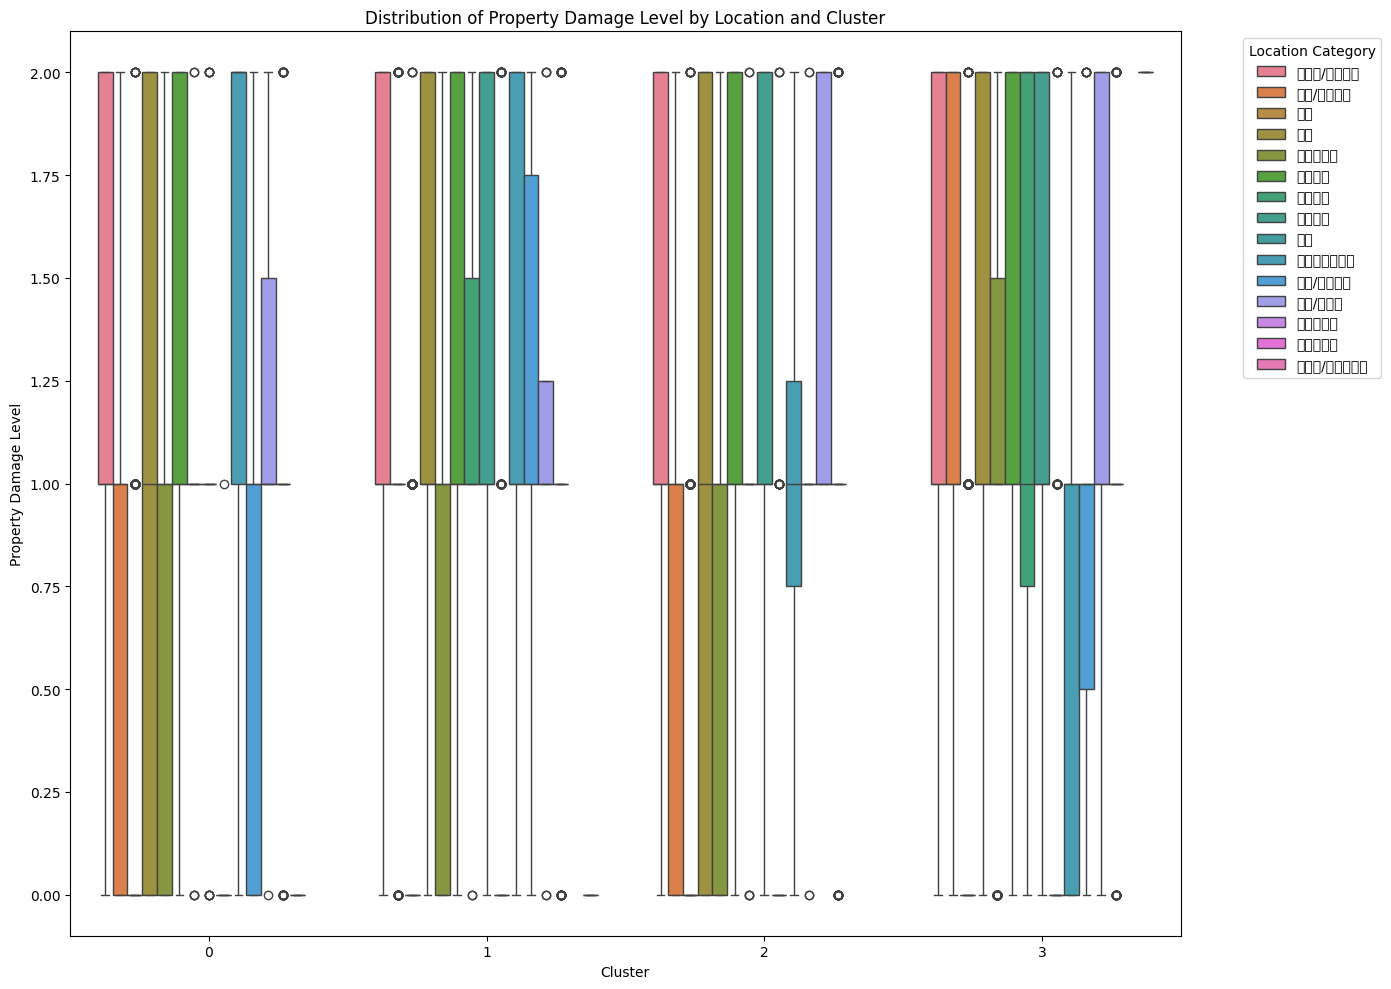

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = merged_df

# 상세 통계 분석
detailed_stats = df.groupby(['location_category_1', 'cluster'])['level_property'].agg(['mean', 'median', 'var', 'min', 'max']).reset_index()
print(detailed_stats)

# 상자 그림 시각화
fig, ax = plt.subplots(figsize=(14, 10))

# 상자 그림 생성
sns.boxplot(x='cluster', y='level_property', hue='location_category_1', data=df, ax=ax)

# 그래프 제목 및 라벨 설정
ax.set_title('Distribution of Property Damage Level by Location and Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Property Damage Level')
ax.legend(title='Location Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
#cluster_0에서 location_category_1별로 level_property의 평균

cluster_0_mean = cluster_0.groupby('location_category_1')['level_property'].mean()
print(cluster_0_mean)


location_category_1
교육시설        0.937500
기타          0.268765
기타서비스       0.946237
문화재시설       0.000000
산업시설        1.178723
생활서비스       0.816754
선박/항공기      1.142857
운수자동차시설     1.466667
의료/복지시설     0.800000
임야          0.020833
자동차/철도차량    1.231454
주거          0.935421
집합시설        1.000000
판매/업무시설     0.909774
Name: level_property, dtype: float64


In [ ]:
#cluster_0에서 location_category_1별로 level_property의 평균

cluster_1_mean = cluster_1.groupby('location_category_1')['level_property'].mean()
print(cluster_1_mean)


location_category_1
교육시설         1.133333
기타           0.163128
기타서비스        0.965278
산업시설         1.165049
생활서비스        0.911330
선박/항공기       1.083333
운수자동차시설      1.200000
위험물/가스제조소    0.000000
의료/복지시설      1.136364
임야           0.245658
자동차/철도차량     1.207756
주거           1.121172
집합시설         1.217391
판매/업무시설      0.975309
Name: level_property, dtype: float64


In [ ]:
# cluster_0에서 location_category_1별로 level_property의 평균

cluster_2_mean = cluster_2.groupby('location_category_1')['level_property'].mean()
print(cluster_2_mean)


location_category_1
교육시설        0.941176
기타          0.176136
기타서비스       0.982143
산업시설        1.167315
생활서비스       0.883838
선박/항공기      1.375000
운수자동차시설     1.000000
의료/복지시설     1.000000
임야          0.094340
자동차/철도차량    1.192893
주거          1.048465
집합시설        1.217391
판매/업무시설     0.920000
Name: level_property, dtype: float64


In [ ]:
# cluster_0에서 location_category_1별로 level_property의 평균

cluster_3_mean = cluster_3.groupby('location_category_1')['level_property'].mean()
print('계절군집 3')
print(cluster_3_mean)


계절군집 3
location_category_1
교육시설         1.125000
기타           0.178960
기타서비스        0.974026
산업시설         1.269690
생활서비스        1.004115
선박/항공기       1.250000
운수자동차시설      0.952381
위험물/가스제조소    2.000000
의료/복지시설      0.962963
임야           0.175325
자동차/철도차량     1.161585
주거           1.149951
집합시설         1.275000
판매/업무시설      1.038278
Name: level_property, dtype: float64


In [ ]:
from google.colab import files
files.download('cluster_0.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cluster_0.to_csv('cluster_1.csv')

In [ ]:
from google.colab import files
files.download('cluster_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 계절군집 0 과 계절군집 1 간의 비슷한 날씨일때의 location_category_1별 재산피해 정도 비교


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances


# 필요한 열 선택
weather_columns = ['ta_max', 'ta_min', 'ta_max_min', 'rn_day', 'ws_max', 'ws_ins_max', 'ws_mean', 'ws_min', 'hm_max', 'hm_mean', 'hm_min']
columns = ['location_category_1'] + weather_columns + ['level_property']

# 데이터 선택
cluster_0_selected = cluster_0[columns]
cluster_1_selected = cluster_1[columns]

# 스케일링
scaler = StandardScaler()
cluster_0_scaled = scaler.fit_transform(cluster_0_selected[weather_columns])
cluster_1_scaled = scaler.transform(cluster_1_selected[weather_columns])

# 유클리드 거리 계산
distances = euclidean_distances(cluster_0_scaled, cluster_1_scaled)

# 유클리드 거리의 기본 통계 출력
print("Distance matrix statistics:")
print("Min:", distances.min())
print("Max:", distances.max())
print("Mean:", distances.mean())
print("Std:", distances.std())

# 비슷한 기상조건 찾기
threshold = 0.9  # 임계값을 높게 설정
similar_conditions_indices = [(i, j) for i in range(cluster_0_scaled.shape[0]) for j in range(cluster_1_scaled.shape[0]) if distances[i, j] < threshold]

# 중간 결과 출력
print(f"Number of similar condition pairs found: {len(similar_conditions_indices)}")

# 결과 저장할 데이터프레임
results = []

for i, j in similar_conditions_indices:
    results.append({
        'location_category_1': cluster_0_selected.iloc[i]['location_category_1'],
        'cluster_0_level_property': cluster_0_selected.iloc[i]['level_property'],
        'cluster_1_level_property': cluster_1_selected.iloc[j]['level_property'],
    })

results_df = pd.DataFrame(results)

# location_category_1별로 level_property의 차이 계산
results_df['level_property_difference'] = results_df['cluster_0_level_property'] - results_df['cluster_1_level_property']

# 결과 출력
from IPython.display import display
display(results_df)

# 각 location_category_1별 평균 차이 계산
mean_diff = results_df.groupby('location_category_1')['level_property_difference'].mean().reset_index()

# 평균 차이 출력
display(mean_diff)



Distance matrix statistics:
Min: 0.5896496601728355
Max: 21.68797395436913
Mean: 8.080434097460001
Std: 2.2868140500067193
Number of similar condition pairs found: 22


,location_category_1,cluster_0_level_property,cluster_1_level_property,level_property_difference
0,주거,0,2,-2
1,자동차/철도차량,0,1,-1
2,자동차/철도차량,0,2,-2
3,자동차/철도차량,0,0,0
4,주거,0,0,0
5,주거,0,0,0
6,주거,0,0,0
7,집합시설,1,0,1
8,집합시설,1,0,1
9,집합시설,1,0,1


,location_category_1,level_property_difference
0,기타,-2.000000
1,기타서비스,0.000000
2,산업시설,0.000000
3,생활서비스,1.250000
4,자동차/철도차량,-0.750000
5,주거,-0.166667
6,집합시설,1.000000
7,판매/업무시설,-1.000000


In [ ]:
results

[{'location_category_1': '산업시설',
  'cluster_0_level_property': 2,
  'cluster_1_level_property': 1},
 {'location_category_1': '주거',
  'cluster_0_level_property': 2,
  'cluster_1_level_property': 0},
 {'location_category_1': '주거',
  'cluster_0_level_property': 2,
  'cluster_1_level_property': 1},
 {'location_category_1': '주거',
  'cluster_0_level_property': 2,
  'cluster_1_level_property': 0},
 {'location_category_1': '기타',
  'cluster_0_level_property': 1,
  'cluster_1_level_property': 1},
 {'location_category_1': '기타',
  'cluster_0_level_property': 1,
  'cluster_1_level_property': 0},
 {'location_category_1': '기타',
  'cluster_0_level_property': 1,
  'cluster_1_level_property': 0},
 {'location_category_1': '기타',
  'cluster_0_level_property': 1,
  'cluster_1_level_property': 0},
 {'location_category_1': '기타',
  'cluster_0_level_property': 1,
  'cluster_1_level_property': 1},
 {'location_category_1': '기타',
  'cluster_0_level_property': 1,
  'cluster_1_level_property': 1},
 {'location_catego

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances


# 필요한 열 선택
weather_columns = ['ta_max', 'ta_min', 'ta_max_min', 'rn_day', 'ws_max', 'ws_ins_max', 'ws_mean', 'ws_min', 'hm_max', 'hm_mean', 'hm_min']
columns = ['location_category_1'] + weather_columns + ['level_property']

# 데이터 선택
cluster_0_selected = cluster_0[columns]
cluster_2_selected = cluster_2[columns]

# 스케일링
scaler = StandardScaler()
cluster_0_scaled = scaler.fit_transform(cluster_0_selected[weather_columns])
cluster_2_scaled = scaler.transform(cluster_2_selected[weather_columns])

# 유클리드 거리 계산
distances = euclidean_distances(cluster_0_scaled, cluster_2_scaled)

# 유클리드 거리의 기본 통계 출력
print("Distance matrix statistics:")
print("Min:", distances.min())
print("Max:", distances.max())
print("Mean:", distances.mean())
print("Std:", distances.std())

# 비슷한 기상조건 찾기
threshold = 0.9  # 임계값을 높게 설정
similar_conditions_indices = [(i, j) for i in range(cluster_0_scaled.shape[0]) for j in range(cluster_2_scaled.shape[0]) if distances[i, j] < threshold]

# 중간 결과 출력
print(f"Number of similar condition pairs found: {len(similar_conditions_indices)}")

# 결과 저장할 데이터프레임
results = []

for i, j in similar_conditions_indices:
    results.append({
        'location_category_1': cluster_0_selected.iloc[i]['location_category_1'],
        'cluster_0_level_property': cluster_0_selected.iloc[i]['level_property'],
        'cluster_2_level_property': cluster_2_selected.iloc[j]['level_property'],
    })

results_df = pd.DataFrame(results)

# location_category_1별로 level_property의 차이 계산
results_df['level_property_difference'] = results_df['cluster_0_level_property'] - results_df['cluster_2_level_property']

# 결과 출력
from IPython.display import display
display(results_df)

# 각 location_category_1별 평균 차이 계산
mean_diff = results_df.groupby('location_category_1')['level_property_difference'].mean().reset_index()

# 평균 차이 출력
mean_diff


Distance matrix statistics:
Min: 0.3746170495607318
Max: 18.528448549605418
Mean: 5.693722982409313
Std: 2.2844401288255978
Number of similar condition pairs found: 1035


,location_category_1,cluster_0_level_property,cluster_2_level_property,level_property_difference
0,판매/업무시설,1,0,1
1,주거,0,2,-2
2,주거,0,1,-1
3,교육시설,1,2,-1
4,자동차/철도차량,1,1,0
...,...,...,...,...
1030,기타,0,1,-1
1031,기타,0,2,-2
1032,주거,0,2,-2
1033,주거,0,0,0


,location_category_1,level_property_difference
0,교육시설,0.000000
1,기타,-0.607143
2,기타서비스,0.354167
3,산업시설,0.426087
4,생활서비스,-0.126984
5,운수자동차시설,0.384615
6,의료/복지시설,-0.500000
7,임야,-0.805556
8,자동차/철도차량,0.377143
9,주거,0.205645


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances


# 필요한 열 선택
weather_columns = ['ta_max', 'ta_min', 'ta_max_min', 'rn_day', 'ws_max', 'ws_ins_max', 'ws_mean', 'ws_min', 'hm_max', 'hm_mean', 'hm_min']
columns = ['location_category_1'] + weather_columns + ['level_property']

# 데이터 선택
cluster_0_selected = cluster_0[columns]
cluster_3_selected = cluster_3[columns]

# 스케일링
scaler = StandardScaler()
cluster_0_scaled = scaler.fit_transform(cluster_0_selected[weather_columns])
cluster_3_scaled = scaler.transform(cluster_3_selected[weather_columns])

# 유클리드 거리 계산
distances = euclidean_distances(cluster_0_scaled, cluster_3_scaled)

# 유클리드 거리의 기본 통계 출력
print("Distance matrix statistics:")
print("Min:", distances.min())
print("Max:", distances.max())
print("Mean:", distances.mean())
print("Std:", distances.std())

# 비슷한 기상조건 찾기
threshold = 2  # 임계값을 높게 설정
similar_conditions_indices = [(i, j) for i in range(cluster_0_scaled.shape[0]) for j in range(cluster_3_scaled.shape[0]) if distances[i, j] < threshold]

# 중간 결과 출력
print(f"Number of similar condition pairs found: {len(similar_conditions_indices)}")

# 결과 저장할 데이터프레임
results = []

for i, j in similar_conditions_indices:
    results.append({
        'location_category_1': cluster_0_selected.iloc[i]['location_category_1'],
        'cluster_0_level_property': cluster_0_selected.iloc[i]['level_property'],
        'cluster_3_level_property': cluster_3_selected.iloc[j]['level_property'],
    })

results_df = pd.DataFrame(results)

# location_category_1별로 level_property의 차이 계산
results_df['level_property_difference'] = results_df['cluster_0_level_property'] - results_df['cluster_3_level_property']

# 결과 출력
from IPython.display import display
display(results_df)

# 각 location_category_1별 평균 차이 계산
mean_diff = results_df.groupby('location_category_1')['level_property_difference'].mean().reset_index()

# 평균 차이 출력
mean_diff


Distance matrix statistics:
Min: 1.5958783297064079
Max: 22.278331245351538
Mean: 10.84785214299802
Std: 2.460304370166803
Number of similar condition pairs found: 20


,location_category_1,cluster_0_level_property,cluster_3_level_property,level_property_difference
0,기타,0,1,-1
1,자동차/철도차량,2,0,2
2,주거,2,0,2
3,주거,0,2,-2
4,주거,0,1,-1
5,주거,1,1,0
6,주거,1,1,0
7,주거,1,1,0
8,주거,1,2,-1
9,기타,0,0,0


,location_category_1,level_property_difference
0,기타,-1.000000
1,자동차/철도차량,2.000000
2,주거,-0.111111
3,판매/업무시설,-0.500000
